In [26]:
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, linspace, exp, real, imag, abs, angle, conj, meshgrid
from numpy.fft import fft, fftshift
from mpl_toolkits.mplot3d import axes3d

In [27]:
%matplotlib inline

In [40]:
b=.08*1e-3

a=.25*1e-3

k=2*pi/(795*1e-9)

wt=0

C=1

L=1.9

d=.03

In [41]:
def alpha(y):
    return k*a*y/(2*L)

In [42]:
def beta(y):
    return k*b*y/(2*L)

In [43]:
def E(y,kt):
    """The double slit pattern, at a specific angle given by the kt transverse wavenumber"""
    return exp(1j*kt*y) * b*C*(sin(beta(y)) / beta(y)) * (sin(wt-k*L) + sin(wt-k*L+2*alpha(y)))

# note, we needed to add an angled phase front with transverse wavenumber kt

In [44]:
kt = k*d/L

From Hecht (4th ed) pg 458

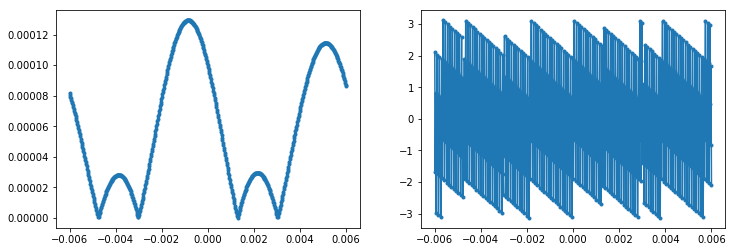

In [45]:
y = linspace(-.006,.006,600)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(y,abs(E(y,kt)),".-")
plt.subplot(122)
plt.plot(y,angle(E(y,kt)),".-")

## Zernike Local Oscillator: 

In [46]:
Z_1=1

In [47]:
def Z_2(x):
    return 2*x
def Z_3(y):
    return 2*y

In [48]:
def Z_4(x,y):
    return (6**.5)*2*x*y

In [49]:
def Z_5(x,y):
    return (3**.5)*(2*x**2+2*y**2-1) 
def Z_6(x,y):
    return (6**.5)*(x**2 - y**2)

In [50]:
def Z_7(x,y):
    return (8**.5)*(3*x**2*y-y**3)
def Z_8(x,y):
    return (8**.5)*(3*x**2*y-y+3*y**3-2*y)

In [51]:
def Z_9(x,y):
    return (8**.5)*(3*x**3+3*x*y**2-2*x)
def Z_10(x,y):
    return (8**.5)*(x**3-3*x*y**2)

In [52]:
def Psi(x,y,w,Cn=[1,0,0,0.5,0,0,0,0,0,0]):
    Zsum = Cn[0]*Z_1 + Cn[1]*Z_2(x) + Cn[2]*Z_3(y) + Cn[3]*Z_4(x,y) + Cn[4]*Z_5(x,y) 
    Zsum += Cn[5]*Z_6(x,y) + Cn[6]*Z_7(x,y) + Cn[7]*Z_8(x,y) + Cn[8]*Z_9(x,y) + Cn[9]*Z_10(x,y)
    return exp(-(x**2 + y**2)/ w**2)* exp(1j*2*pi*Zsum)

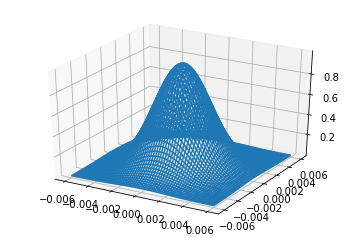

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.158,-.025,.025,-.007,-.143,-.008,-.006,.007,.01,-.011])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [21]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

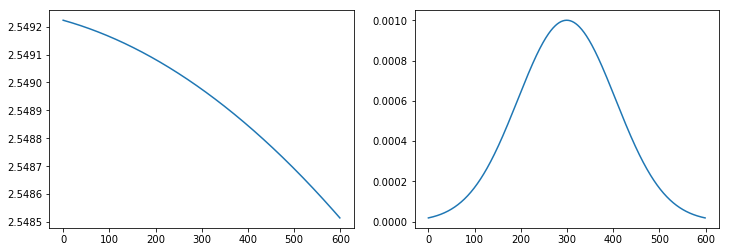

In [22]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

## The phase front is slightly curved, but note the y-scale. It is effectively a plane wave.

In [23]:
TotalIntensity=(E(y,kt)+LObeam) * (E(y,kt)+LObeam).conj()

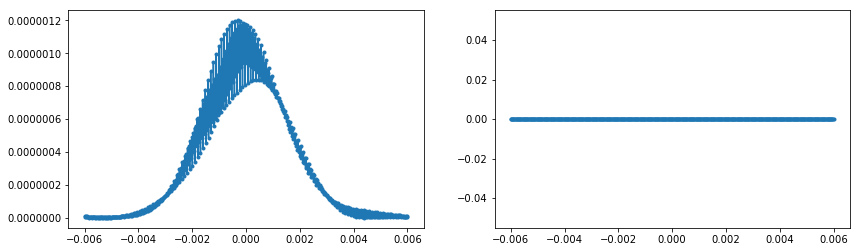

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

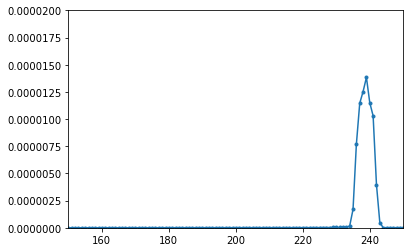

In [25]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

This looks decent... at least it agrees with what we've seen in other models. Next: start plugging in data from other beam measurements

## Small lense @ 100 cm

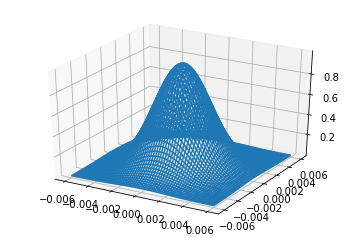

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.51,.022,-.021,.043,-.554,0,.026,-.021,0,-.023])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [57]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

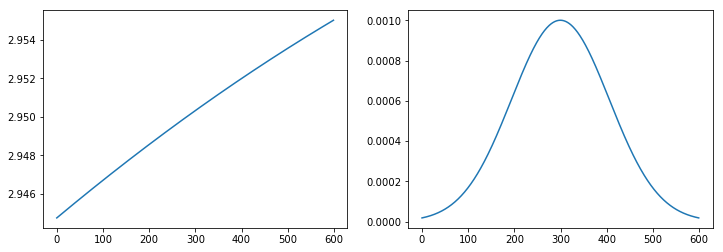

In [58]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

In [59]:
TotalIntensity=(E(y,kt)+LObeam) * (E(y,kt)+LObeam).conj()

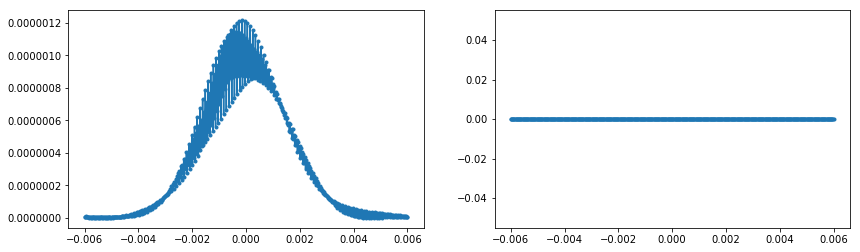

In [60]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

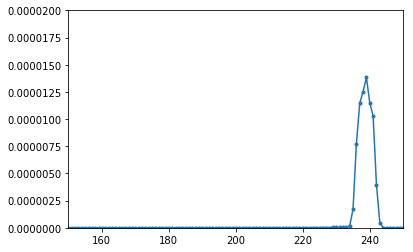

In [61]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

## Small Lense @ 100.5 cm

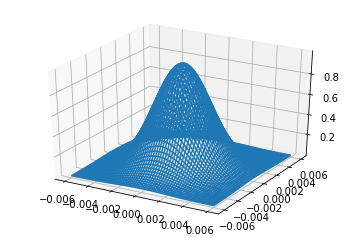

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.65,.09,-.12,.02,-.65,-.01,.03,0,0,-.01])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [69]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

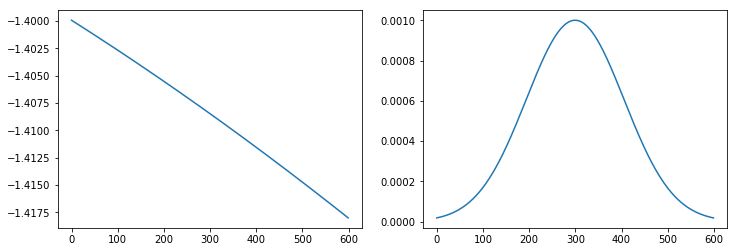

In [70]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

In [71]:
TotalIntensity=(E(y,kt)+LObeam) * (E(y,kt)+LObeam).conj()

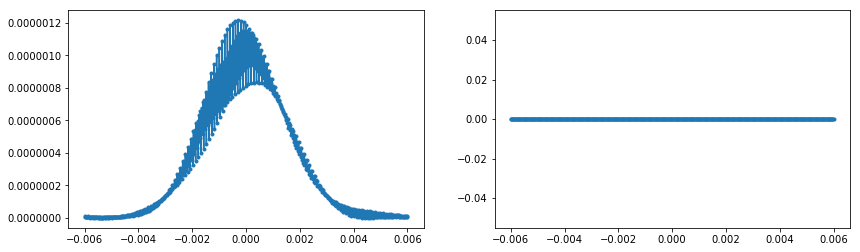

In [72]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

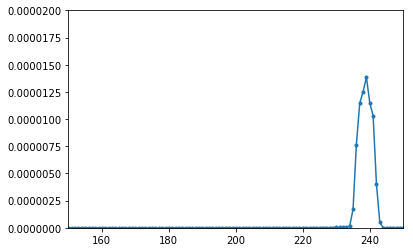

In [73]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

## Small lense @ 101 cm

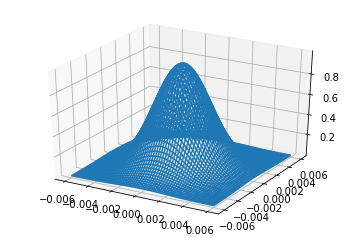

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.49,.23,0,.02,-.74,-0.01,.02,0,0.005,-.02])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [83]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

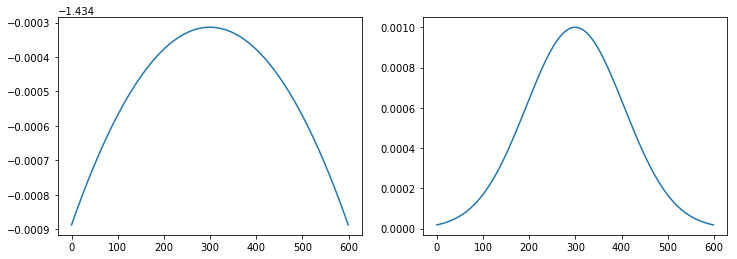

In [88]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

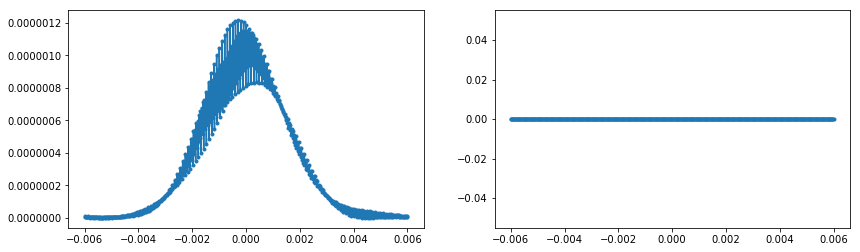

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

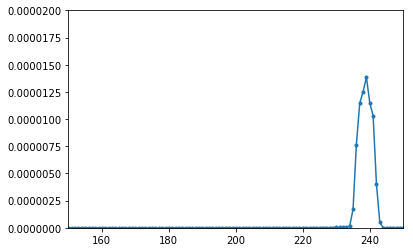

In [86]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

## Small lense @ 99.3 cm

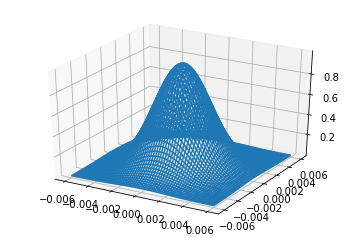

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.12,.08,0.018,.039,-.275,.031,0,0,.003,-.027])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [96]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

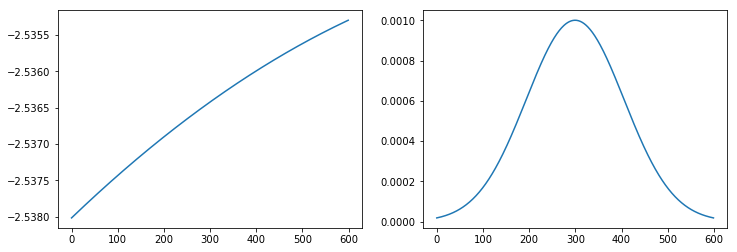

In [97]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

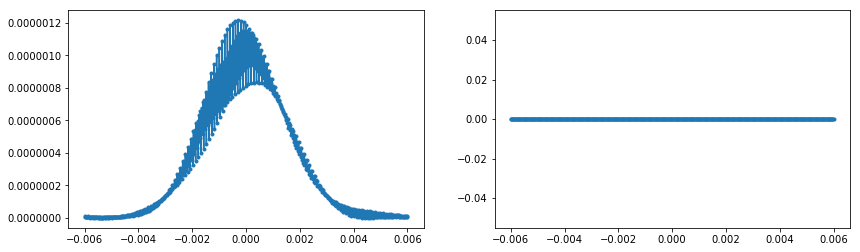

In [98]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

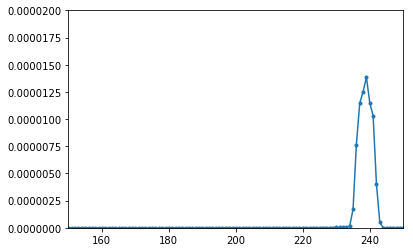

In [99]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

## Small lense @ 99 cm

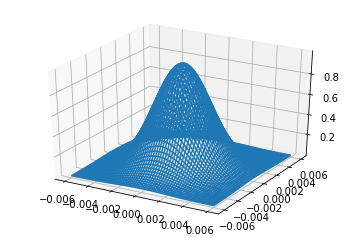

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[-1.4,-.7,0.13,-.12,1.89,.18,0.13,-.53,.36,-.03])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [113]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

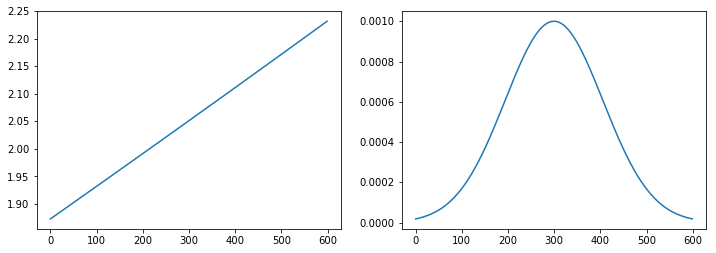

In [114]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

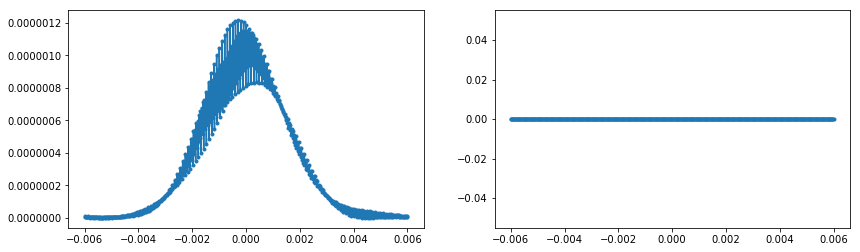

In [115]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

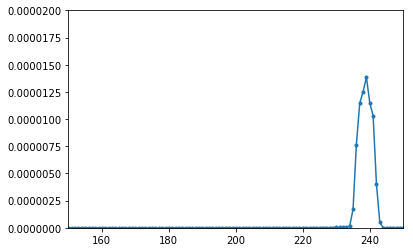

In [116]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

## Small lense @ 98.5 cm

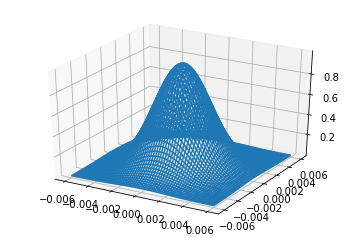

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[-1.25,.35,0.27,-.03,.53,0,0.04,.03,0,.04])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [127]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

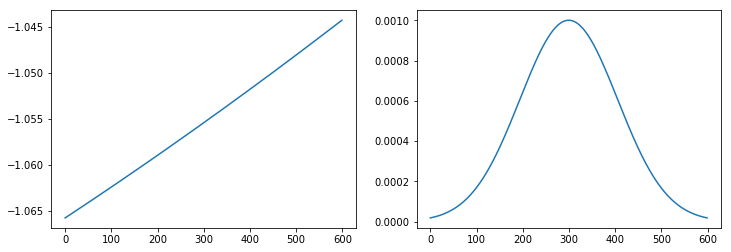

In [128]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

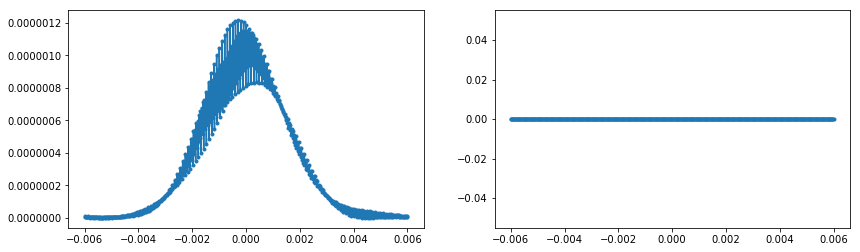

In [132]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

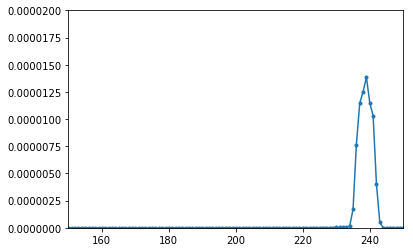

In [133]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

## Signal Beam through double slit

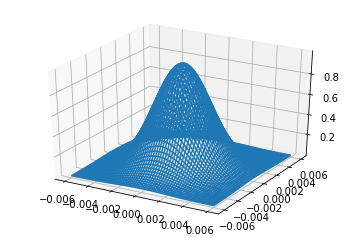

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.2,0,-.07,-.04,-.16,.07,-.02,.01,-.01,0])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [143]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

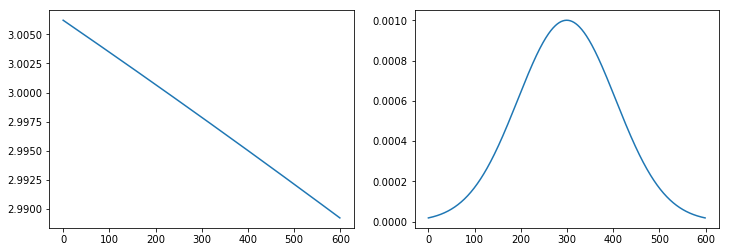

In [144]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

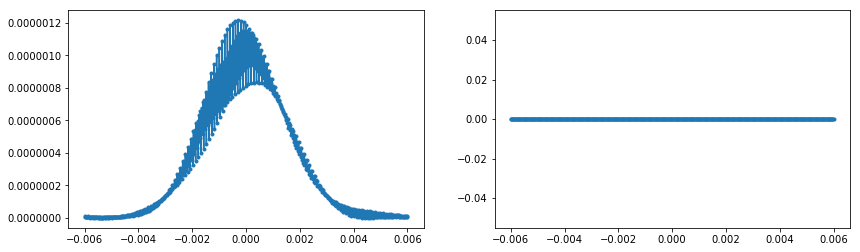

In [147]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

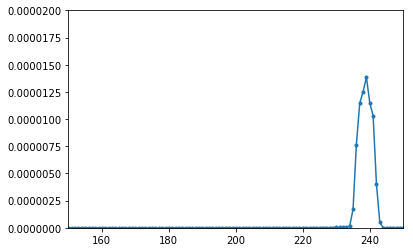

In [148]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

## Reference and Signal Beam Interfering

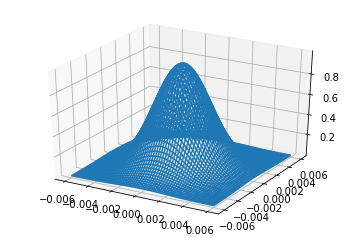

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.15,0,.01,-.04,-.12,-0.03,-0.02,.015,0.01,.01])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [150]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

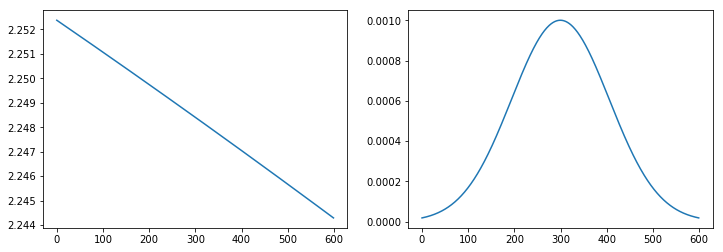

In [151]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

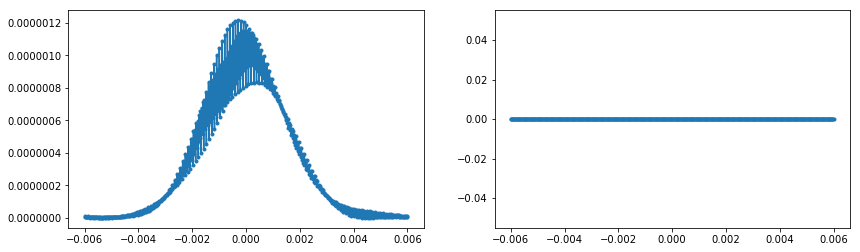

In [152]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

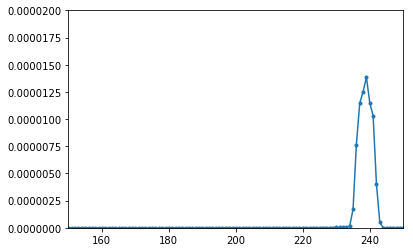

In [153]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])